Use of TRandom https://root.cern.ch/doc/master/classTRandom.html#aac1fe20159b9b79d8831f6edb4e35be0

if no seed is given, default is 1

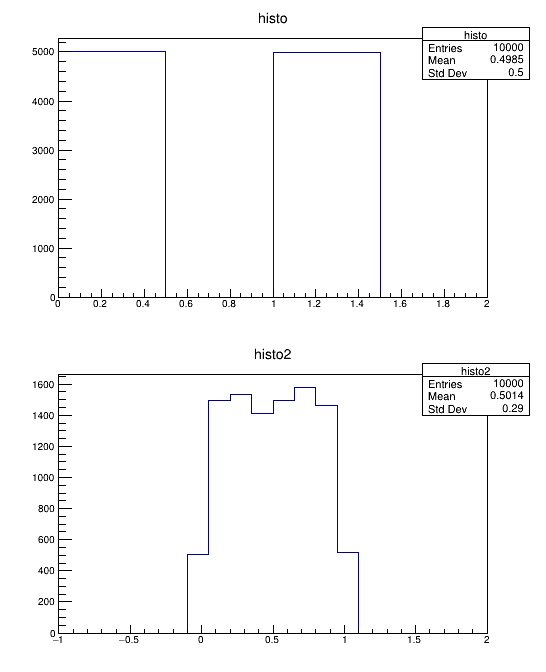

Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: histo2 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [70]:
iterations = 10000;
seed = 1;

TH1F *histo = new TH1F("histo","histo",4,0,2);
TH1F *histo2 = new TH1F("histo2","histo2",20,-1,2);
vector <double> vec_r(iterations);
TRandom2 *rand = new TRandom2(seed);

for(int i = 0; i < iterations ; i++){
    double r = rand->Rndm();
    int rr = rand->Binomial(1,0.5);
    
    vec_r[i] = r;    
    histo->Fill(rr);
}

for(int i = 0; i < vec_r.size(); i++){
    histo2->Fill(vec_r[i]);
}

TCanvas *canvas = new TCanvas("Canvas","",550,700);
canvas->Divide(1,2);
histo->SetStats(1);
// histo->SetBit(TH1::kNoStats);
canvas->cd(1);  histo->Draw();
canvas->cd(2);  histo2->Draw();
canvas->Draw();

### Creating an array of $n$ lorentz vectors

# Operating histograms

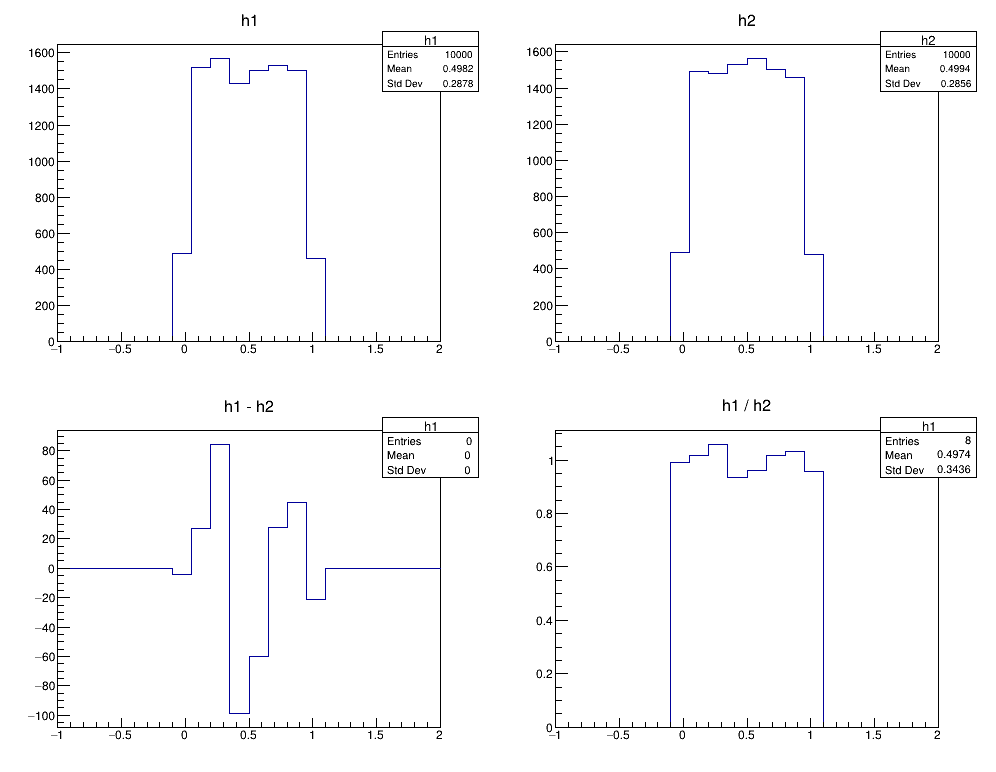

In [2]:
TRandom2 *rand = new TRandom2();
TRandom2 *rand2 = new TRandom2(2);

TH1F *h1 = new TH1F("h1","h1",20,-1,2);
TH1F *h2 = new TH1F("h2","h2",20,-1,2);

for(int i = 0; i < 10000; i++){
    double r = rand->Rndm();
    double r2 = rand2->Rndm();
    h1->Fill(r);
    h2->Fill(r2);
}

// CLONING H1
TH1F *h1_copy = (TH1F*) h1->Clone();
TH1F *h1_copy2 = (TH1F*) h1->Clone();

// SUBSTRACTION 
h1_copy->Add(h2, -1);  h1_copy->SetTitle("h1 - h2");
// DIVISION
h1_copy2->Divide(h2);  h1_copy2->SetTitle("h1 / h2");

// PLOTTING
TCanvas *canvas = new TCanvas("Canvas","",1000,800);
canvas->Divide(2,2);

canvas->cd(1); h1->Draw();
canvas->cd(2); h2->Draw();
canvas->cd(3); h1_copy->Draw();
canvas->cd(4); h1_copy2->Draw();
canvas->Draw();

### GetBinContent(), GetNcells(), SetBinContent()

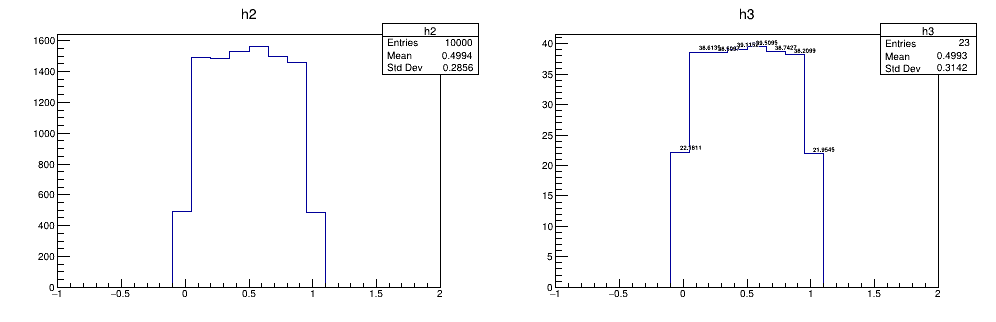

h2 Ncells: 22
1 0
2 0
3 0
4 0
5 0
6 0
7 0
8 492
9 1491
10 1483
11 1530
12 1561
13 1501
14 1460
15 482
16 0
17 0
18 0
19 0
20 0
21 0
22 0
23 0


Warning in <TROOT::Append>: Replacing existing TH1: h3 (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [22]:
int count = 1;
TH1F *h3 = new TH1F("h3","h3",20,-1,2);

cout  << "h2 Ncells: " << h2->GetNcells() << endl ;
for (int bin=0; bin<=h2->GetNcells(); ++bin) {
    h3->SetBinContent(bin, sqrt(h2->GetBinContent(bin)));
    cout  << count << " " << h2->GetBinContent(bin) << endl ;
    count++;
}

TCanvas *canvas = new TCanvas("Canvas","",1000,350); canvas->Divide(2,1);
canvas->cd(1); h2->Draw(); 
canvas->cd(2); h3->Draw("text colz1"); 
canvas->Draw()

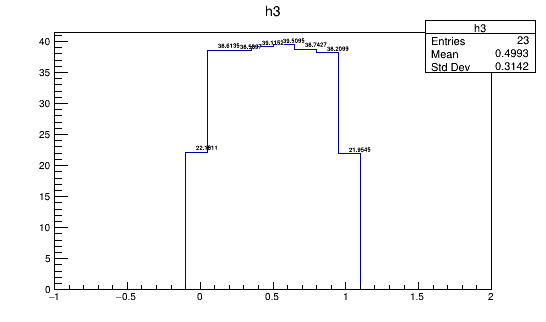

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [15]:
TCanvas *canvas = new TCanvas("Canvas","",550,350);
h3->Draw("text colz1"); canvas->Draw()

## Example X (bin entries showing)
Sometimes the change of the range of the Z axis is unwanted, in which case, one can use SAME0 (or SAMES0) option to opt out of this change.
https://root.cern/doc/master/classTHistPainter.html



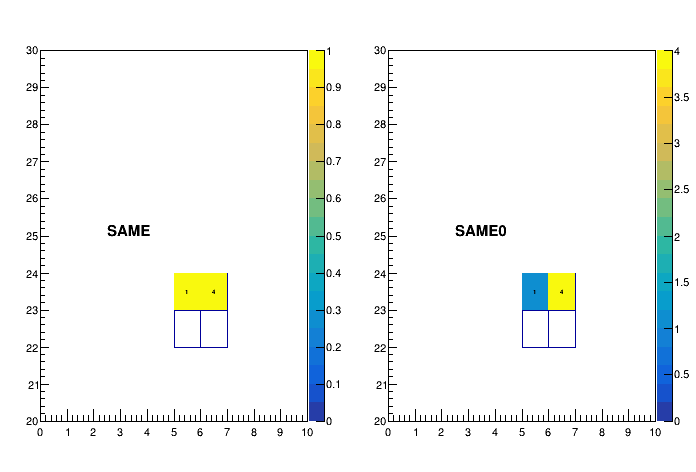

Warning in <TROOT::Append>: Replacing existing TH1: h2 (Potential memory leak).


In [80]:
auto h2 = new TH2F("h2"," ",10,0,10,10,20,30);
auto hf = (TH2F*)h2->Clone("hf");
h2->SetBit(TH1::kNoStats);
hf->SetBit(TH1::kNoStats);
h2->Fill(5,22);
h2->Fill(5,23);
h2->Fill(6,22);
h2->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(6,23);
hf->Fill(5,23);

auto hf_copy1 = hf->Clone("hf_copy1");
auto lt = new TLatex();

auto cx = new TCanvas(); cx->Divide(2,1);

cx->cd(1);
h2->Draw("box");
hf->Draw("text colz same");
lt->DrawLatexNDC(0.3,0.5,"SAME");

cx->cd(2);
h2->Draw("box");
hf_copy1->Draw("text colz same0");
lt->DrawLatexNDC(0.3,0.5,"SAME0");
cx->Draw()

## 5.19 3D Implicit Functions 
https://root.cern.ch/root/htmldoc/guides/users-guide/Histograms.html

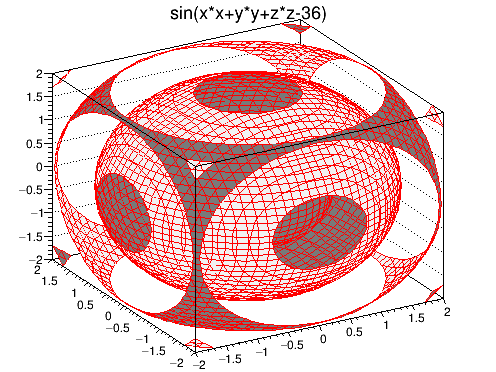

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [77]:
TCanvas *canvas = new TCanvas("Canvas","",500,400);
TF3 *fun3 = new TF3("fun3","sin(x*x+y*y+z*z-36)",-2,2,-2,2,-2,2);
fun3->Draw();
canvas->Draw();

The COLor option https://root.cern/doc/master/classTHistPainter.html#HP14

# rebinning

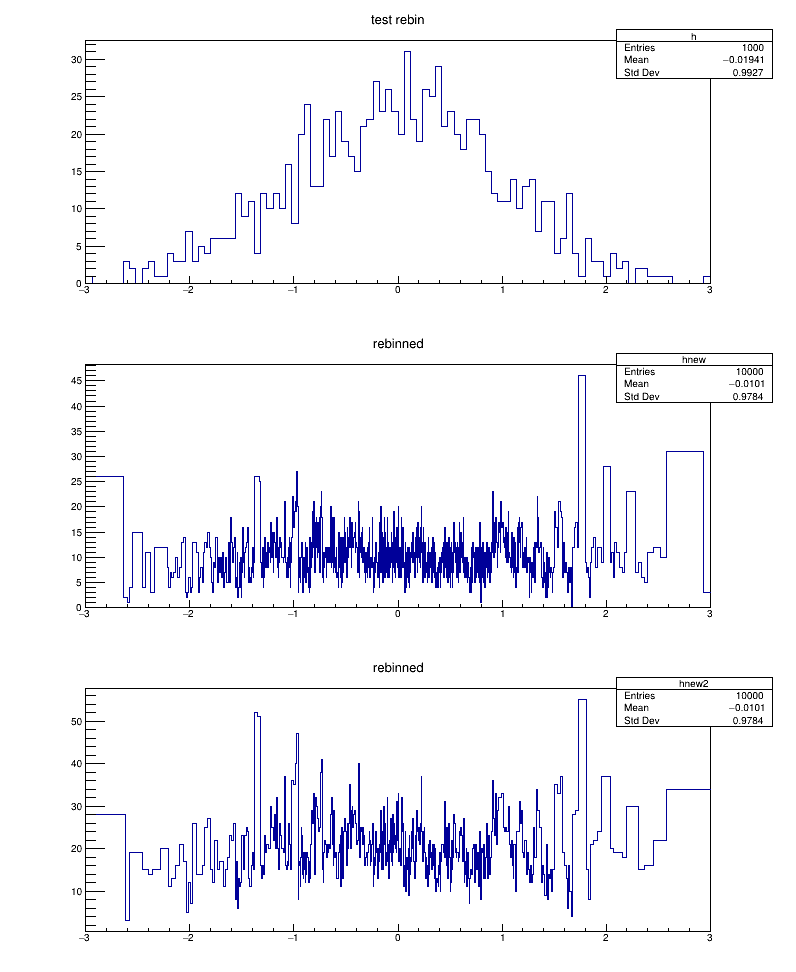

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hnew (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [42]:
//create a fix bin histogram
TH1F *h = new TH1F("h","test rebin",100,-3,3);
Int_t nentries = 1000;
h->FillRandom("gaus",nentries);

Double_t xbins[1001];
Int_t k=0;
TAxis *axis = h->GetXaxis();
for (Int_t i=1; i<=100; i++) {
  Int_t y = (Int_t)h->GetBinContent(i);
  if (y <=0) continue;
  Double_t dx = axis->GetBinWidth(i)/y;
  Double_t xmin = axis->GetBinLowEdge(i);
  for (Int_t j=0; j<y; j++) {
     xbins[k] = xmin + j*dx;
     k++;
  }
}
xbins[k] = axis->GetXmax();
//create a variable bin-width histogram out of fix bin histogram
//new rebinned histogram should have about 10 entries per bin
TH1F *hnew = new TH1F("hnew","rebinned",k,xbins);
hnew->FillRandom("gaus",10*nentries);


//rebin hnew keeping only 50% of the bins
Double_t xbins2[501];
Int_t kk=0;
for (Int_t j = 0; j < k; j += 2) {
  xbins2[kk] = xbins[j];
  kk++;
}
xbins2[kk] = xbins[k];
TH1F *hnew2 = (TH1F*)hnew->Rebin(kk,"hnew2",xbins2);



//draw the 3 histograms
TCanvas *c1 = new TCanvas("c1","c1",800,1000);
c1->Divide(1,3);
c1->cd(1);  h->Draw();
c1->cd(2);  hnew->Draw();
c1->cd(3);  hnew2->Draw();
c1->Draw();

In [33]:
xbins[k] = axis->GetXmax();
xbins[k];

sizeof(xbins);
k

(int) 1000


In [3]:
double aa[3];

(double [3]) { 0.0000000, 0.0000000, 0.0000000 }


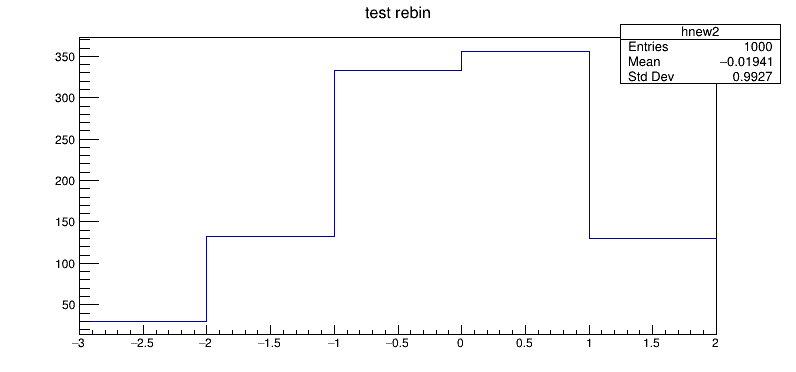

Warning in <TH1F::Rebin>: Bin edge 2 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1F::Rebin>: Bin edge 3 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TH1F::Rebin>: Bin edge 5 of rebinned histogram does not match any bin edges of the old histogram. Result can be inconsistent
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [46]:
Double_t xxbins[] = {-3.0,-2,-1, 0, 1,2,3.0};
Int_t xx = 5;

TH1F *htest = (TH1F*)h->Rebin(xx,"hnew2",xxbins);

//draw the 3 histograms
TCanvas *c1 = new TCanvas("c1","c1",800,400);
htest->Draw();
c1->Draw();

In [25]:
htest->GetNcells()

(int) 6


In [15]:
Double_t xbins[6] = {1,1,10,1,3,1};
sizeof(xbins)

(unsigned long) 48


In [7]:
//create a fix bin histogram
TH1F *h = new TH1F("h","test rebin",100,-3,3);
Int_t nentries = 1000;
h->FillRandom("gaus",nentries);

Double_t xbins[1001];
Int_t k=0;
TAxis *axis = h->GetXaxis();
for (Int_t i=1; i<=100; i++) {
  Int_t y = (Int_t)h->GetBinContent(i);
  if (y <=0) continue;
  Double_t dx = axis->GetBinWidth(i)/y;
  Double_t xmin = axis->GetBinLowEdge(i);
  for (Int_t j=0; j<y; j++) {
     xbins[k] = xmin + j*dx;
     k++;
  }
}

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


In [16]:
axis->GetBinWidth(3)

(double) 0.060000000


In [32]:
axis->GetBinLowEdge(1)

(double) -3.0000000


In [5]:
xbins[]

(double) 0.018260870


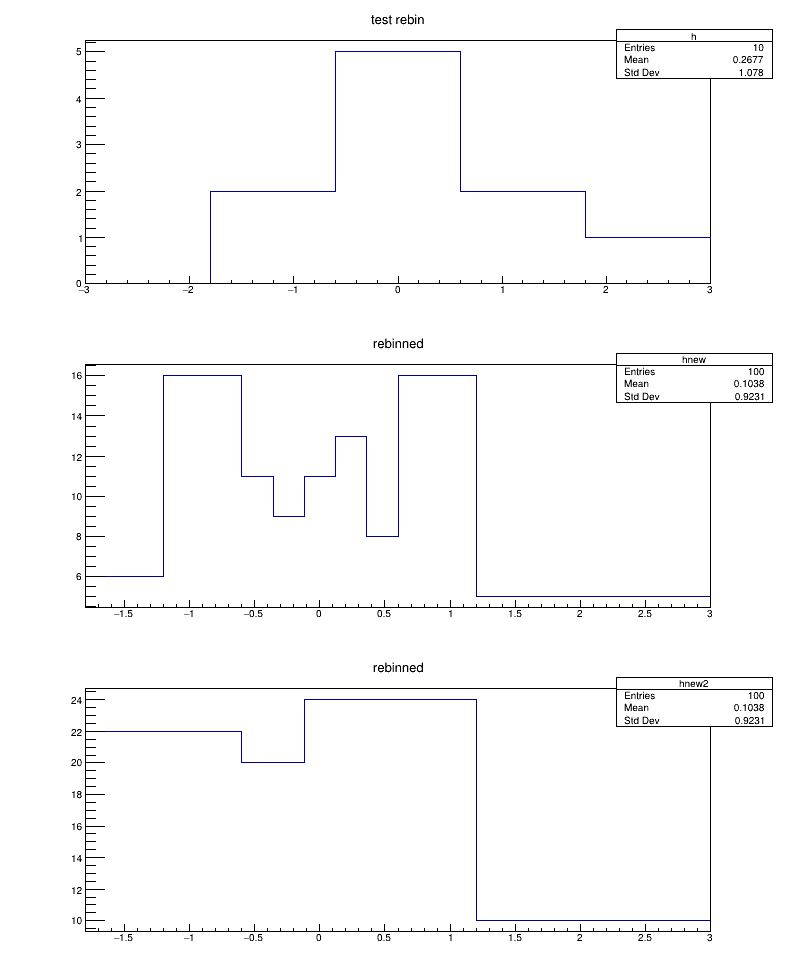

Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: hnew (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [38]:
int orig_bins = 5;
Int_t nentries = 10;

//create a fix bin histogram
TH1F *h = new TH1F("h","test rebin",orig_bins,-3,3);
h->FillRandom("gaus",nentries);

Double_t xbins[11];
Int_t k=0;
TAxis *axis = h->GetXaxis();
for (Int_t i=1; i<=orig_bins; i++) {
  Int_t y = (Int_t)h->GetBinContent(i);
  if (y <=0) continue;
  Double_t dx = axis->GetBinWidth(i)/y;
  Double_t xmin = axis->GetBinLowEdge(i);
  for (Int_t j=0; j<y; j++) {
     xbins[k] = xmin + j*dx;
     k++;
  }
}
xbins[k] = axis->GetXmax();
//create a variable bin-width histogram out of fix bin histogram
//new rebinned histogram should have about 10 entries per bin
TH1F *hnew = new TH1F("hnew","rebinned",k,xbins);
hnew->FillRandom("gaus",10*nentries);


//rebin hnew keeping only 50% of the bins
Double_t xbins2[51];
Int_t kk=0;
for (Int_t j = 0; j < k; j += 2) {
  xbins2[kk] = xbins[j];
  kk++;
}
xbins2[kk] = xbins[k];
TH1F *hnew2 = (TH1F*)hnew->Rebin(kk,"hnew2",xbins2);


//draw the 3 histograms
TCanvas *c1 = new TCanvas("c1","c1",800,1000);
c1->Divide(1,3);
c1->cd(1);  h->Draw();
c1->cd(2);  hnew->Draw();
c1->cd(3);  hnew2->Draw();
c1->Draw();

In [13]:
xbins

(Double_t [11]) { -3.0000000, -2.4000000, -1.8000000, -0.60000000, -0.30000000, -1.1102230e-16, 0.30000000, 0.60000000, 1.8000000, 2.4000000, 3.0000000 }


In [15]:
int nn = 10;
Double_t xbins[10];

# TH2Poly

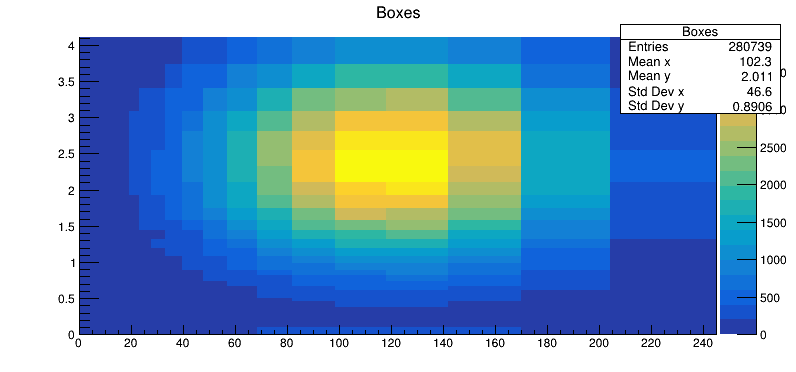

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [12]:
gStyle->SetPalette(57);
TH2Poly *h2p = new TH2Poly();
h2p->SetName("Boxes");
h2p->SetTitle("Boxes");

Int_t i,j;
Int_t nx = 40;
Int_t ny = 40;
Double_t xval1,yval1,xval2,yval2;
Double_t dx=0.2, dy=0.1;
xval1 = 0.;
xval2 = dx;

for (i = 0; i<nx; i++) {
  yval1 = 0.;
  yval2 = dy;
  for (j = 0; j<ny; j++) {
     h2p->AddBin(xval1, yval1, xval2, yval2);
     yval1 = yval2;
     yval2 = yval2+yval2*dy;
  }
  xval1 = xval2;
  xval2 = xval2+xval2*dx;
}

TRandom ran;
for (i = 0; i<300000; i++) {
  h2p->Fill(50*ran.Gaus(2.,1), ran.Gaus(2.,1));
}


TCanvas *c1 = new TCanvas("c1","c1",800,400);
h2p->Draw("COLZ");
c1->Draw();

In [14]:
h2p->GetNcells()

(int) 1609


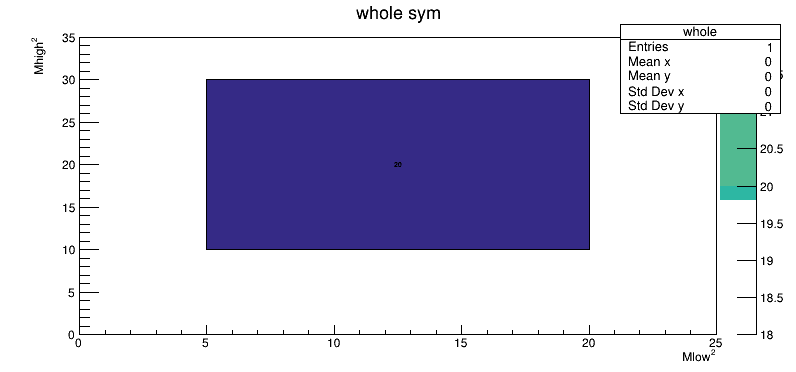

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [2]:
TH2Poly *h2p = new TH2Poly("whole","whole sym; Mlow^{2}; Mhigh^{2}",10,0,25, 10, 0, 35);

Double_t xval1 = 5, yval1 = 10, xval2 = 20,yval2 = 30;
h2p->AddBin(xval1, yval1, xval2, yval2);
h2p->SetBinContent(1,20);

TCanvas *c1 = new TCanvas("c1","c1",800,400);
h2p->Draw("text COLZ");
c1->Draw();

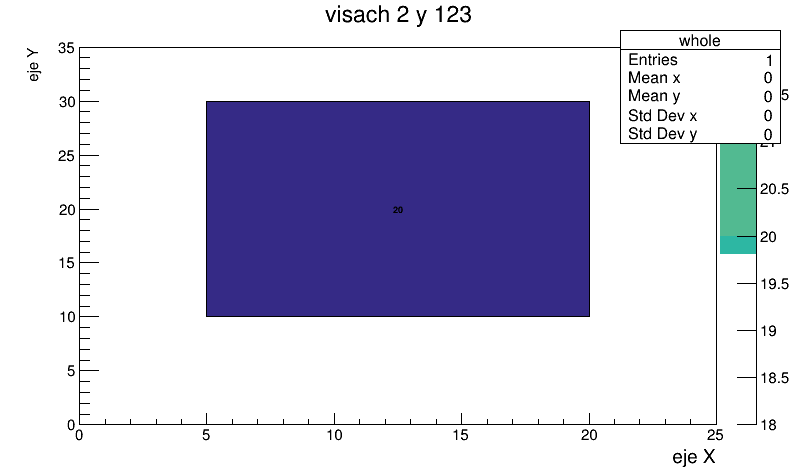

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: pdf file holi2.pdf has been created


In [15]:
int xx = 2;

TH2Poly *h2p = new TH2Poly("whole",Form("visach %d y %d; eje X; eje Y", xx,123),10,0,25, 10, 0, 35);

Double_t xval1 = 5, yval1 = 10, xval2 = 20,yval2 = 30;
h2p->AddBin(xval1, yval1, xval2, yval2);
h2p->SetBinContent(1,20);

TCanvas *c1 = new TCanvas("c1","c1",800,500);
h2p->Draw("text COLZ");
h2p->GetXaxis()->SetTitleSize(.044);
c1->Draw();
c1->Print(Form("holi%i.pdf",2),"Title: ");

In [10]:
  int B_window[]={40,45,50,55,60,65,70};  
size(B_window)

(unsigned long) 7


In [11]:
  int B_window[];

input_line_83:2:8: error: definition of variable with array type needs an explicit size or an initializer
   int B_window[];
       ^


# fit

fitting histograms https://root.cern.ch/root/htmldoc/guides/users-guide/FittingHistograms.html

from fit tutorials https://root.cern/doc/v608/FittingDemo_8C.html

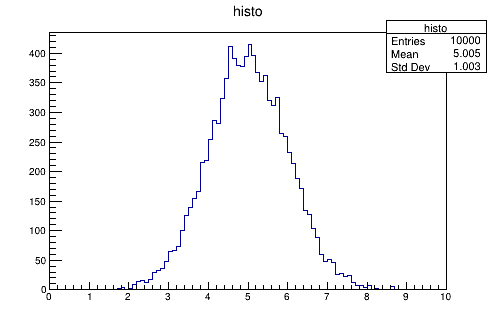

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [4]:
iterations = 10000;      seed = 1;

TH1F *histo = new TH1F("histo","histo",100,0,10);
TRandom2 *rand = new TRandom2(seed);
for(int i = 0; i < iterations ; i++){
    double r = rand->Gaus(5,1);  
    histo->Fill(r);
}
TCanvas *canvas = new TCanvas("Canvas","",500,350);
histo->SetStats(1);
// histo->SetBit(TH1::kNoStats);
histo->Draw();   canvas->Draw();

### two methods for normalizing

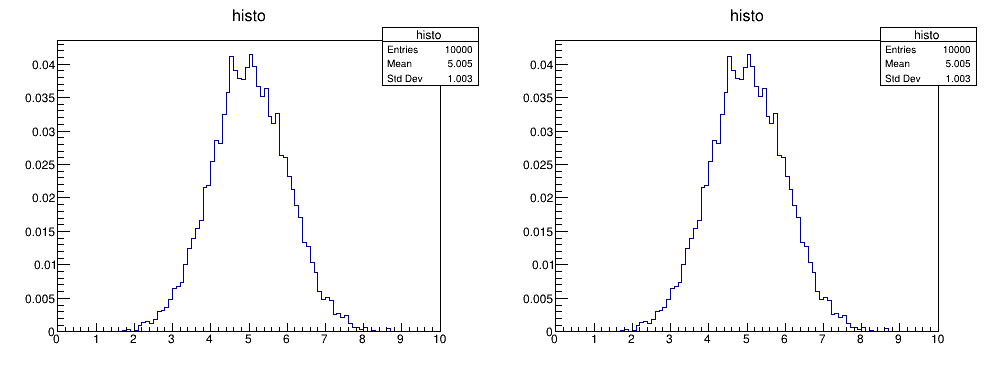

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [9]:
TCanvas *canvas = new TCanvas("Canvas","",1000,400);   canvas->Divide(2,1); // 2 cols 1 row
histo->SetStats(1);
TH1F *histo2 = (TH1F*) histo->Clone();   TH1F *histo3 = (TH1F*) histo->Clone();

// FIRST METHOD
canvas->cd(1);  histo2->DrawNormalized();

// SECOND METHOD
Float_t scale = histo3->Integral();
histo3->Scale(1/scale);
canvas->cd(2);  histo3->Draw("hist");

canvas->Draw();

### gauss

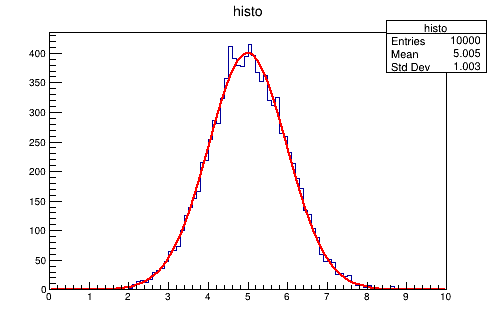

 FCN=65.2885 FROM MIGRAD    STATUS=CONVERGED      52 CALLS          53 TOTAL
                     EDM=2.55514e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     4.00169e+02   4.89988e+00   1.59591e-02  -1.51808e-04
   2  Mean         5.00438e+00   9.97329e-03   3.96277e-05  -1.85056e-02
   3  Sigma        9.90864e-01   6.99403e-03   7.60775e-06  -3.19363e-01


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [11]:
TCanvas *canvas = new TCanvas("Canvas","",500,350);
histo->Fit("gaus");
canvas->Draw();

double val = p0*exp(-0.5*((arg-p1)/p2)^2);

### drawing a function

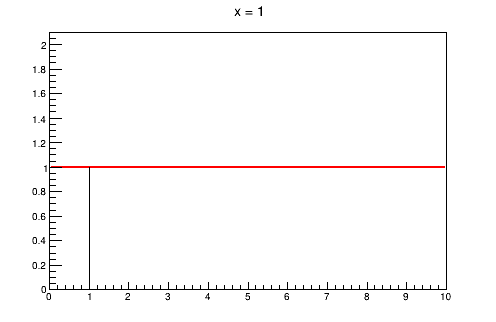

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [55]:
TCanvas *canvas = new TCanvas("Canvas","",500,350);
TF1 *constant = new TF1("constant","x = 1", 0,10);
constant->Draw();

TLine *l = new TLine(1,0,1,1);
l->Draw();

canvas->Draw();

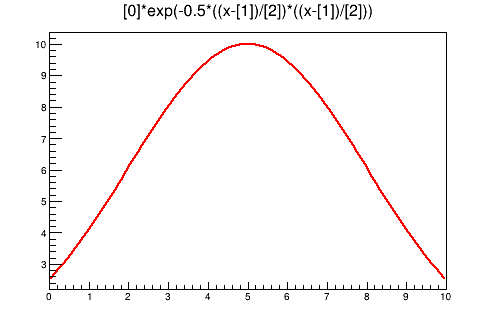

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [13]:
TCanvas *canvas = new TCanvas("Canvas","",500,350);
TF1 *func2 = new TF1("fit2","[0]*exp(-0.5*((x-[1])/[2])*((x-[1])/[2]))", 0,10);
func2->SetParameter(0,10);
func2->SetParameter(1,5);
func2->SetParameter(2,3);
func2->Draw();
canvas->Draw();

### fitting user defined function way 1

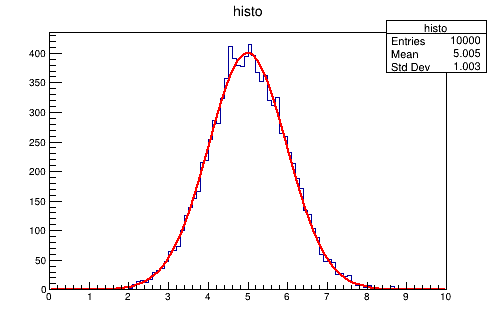

 FCN=65.2885 FROM MIGRAD    STATUS=CONVERGED     164 CALLS         165 TOTAL
                     EDM=4.18853e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.00172e+02   4.89989e+00   1.59617e-02   1.31969e-04
   2  p1           5.00438e+00   9.97325e-03   3.96332e-05  -3.91678e-03
   3  p2           9.90863e-01   6.99401e-03   2.27774e-05  -5.34058e-02


In [19]:
TF1 *func2 = new TF1("fit2","[0]*exp(-0.5*((x-[1])/[2])*((x-[1])/[2]))", 0,10);
func2->SetParameter(0,10);
func2->SetParameter(1,5);
func2->SetParameter(2,3);
histo->Fit("fit2");
canvas->Draw();

### fitting user defined function way 2

fitf from https://root.cern.ch/root/htmldoc/guides/users-guide/FittingHistograms.html

In [16]:
Double_t fitf(Double_t *x,Double_t *par) {
    Double_t arg = 0;
    if (par[2]!=0) arg = (x[0] - par[1])/par[2];
    Double_t fitval = par[0]*TMath::Exp(-0.5*arg*arg);
    return fitval;
}

simpler version of fitf, both work

In [5]:
Double_t fitf2(Double_t x,Double_t *par) {
    Double_t arg = (x - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg);
    return fitval;
}

In [23]:
Double_t fitf3(Double_t *x,Double_t *par) {
    Double_t arg = (x[0] - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg);
    return fitval;
}

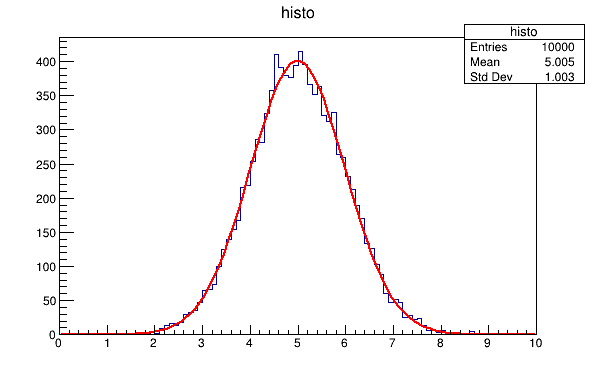

 FCN=65.2885 FROM MIGRAD    STATUS=CONVERGED     164 CALLS         165 TOTAL
                     EDM=4.18853e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           4.00172e+02   4.89989e+00   1.59617e-02   1.31969e-04
   2  p1           5.00438e+00   9.97325e-03   3.96332e-05  -3.91678e-03
   3  p2           9.90863e-01   6.99401e-03   2.27774e-05  -5.34058e-02


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [24]:
TCanvas *canvas = new TCanvas("Canvas","",600,400);
TF1 *func = new TF1("fit",fitf3, 4,6,3);
func->SetParameter(0,10);
func->SetParameter(1,5);
func->SetParameter(2,3);
histo->Fit("fit");
canvas->Draw();

### loading file

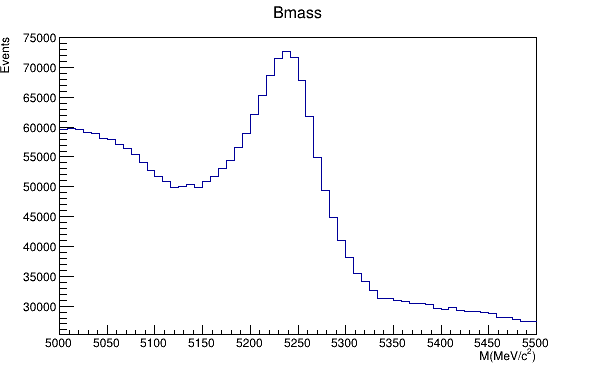

Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas


In [18]:
TFile *f = new TFile("PPP_Bmass.root");
TH1F *hpx = (TH1F*)f->Get("PPP_Bmass_raw");

TCanvas *canvas = new TCanvas("Canvas","",600,400);
hpx->Draw();
canvas->Draw();

In [25]:
Double_t fitf3(Double_t *x,Double_t *par) {
    Double_t arg = (x[0] - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg);
    return fitval;
}

In [45]:
Double_t exponen(Double_t *x,Double_t *par) {
    Double_t fitval = par[0]*exp(-par[1]*x[0]);
    return fitval;
}

In [8]:
Double_t ajuste(Double_t x,Double_t *par) {
    Double_t arg = (x - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg) + (1-par[0])*exp(-par[3]*x);
    return fitval;
}

In [58]:
Double_t ajuste2(Double_t *x,Double_t *par) {
    Double_t arg = (x[0] - par[1])/par[2];
    Double_t fitval = par[0]*exp(-0.5*arg*arg) + (1-par[0])*exp(-par[3]*(x[0]-par[4]));
    return fitval;
}

In [46]:
Double_t lorentzianPeak(Double_t *x, Double_t *par) {
  return (0.5*par[0]*par[1]/TMath::Pi()) /
    TMath::Max( 1.e-10,(x[0]-par[2])*(x[0]-par[2])
   + .25*par[1]*par[1]);
}

In [47]:
// Sum of background and peak function
Double_t fitFunction(Double_t *x, Double_t *par) {
  return exponen(x,par) + lorentzianPeak(x,&par[3]);
}

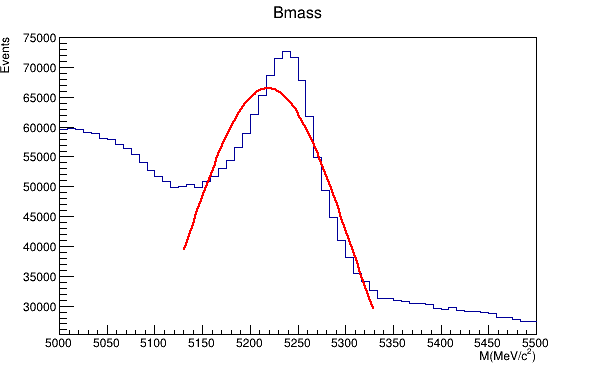

 FCN=8053.68 FROM MIGRAD    STATUS=FAILED        405 CALLS         406 TOTAL
                     EDM=1.47939e+307    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   0.6 per cent
  EXT PARAMETER                APPROXIMATE        STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           6.64354e+04   7.99500e+01   0.00000e+00  -2.18045e-02
   2  p1           5.21913e+03   1.00791e+00  -0.00000e+00   8.90382e+00
   3  p2           8.63780e+01   1.01710e+00   0.00000e+00  -9.24731e+00
   4  p3           1.00033e+02   1.00000e+00   0.00000e+00 -3.54092e+305
   5  p4           4.82060e+03   1.00000e+00  -0.00000e+00   0.00000e+00


Warning in <TCanvas::Constructor>: Deleting canvas with same name: Canvas
Warning in <Fit>: Abnormal termination of minimization.


In [73]:
TCanvas *canvas = new TCanvas("Canvas","",600,400);
TF1 *func = new TF1("fit",ajuste2, 5130,5330,5);
func->SetParameter(0,75000);
func->SetParameter(1,5250);
func->SetParameter(2,50);
func->SetParameter(3,100);
func->SetParameter(4,5000);
// func->SetParameter(5,3000);
hpx->Fit("fit","R");
canvas->Draw();